<h1><center>MNIST classification using Keras<center></h1>

***Students***

Bernardo Torres

Filipe Lauar

# Importing Keras

In [ ]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.4.1
Using keras version 2.4.3


## Loading and preparing the MNIST dataset

Again, load the dataset via ```keras.datasets```, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [ ]:
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [ ]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [ ]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape((X_train.shape[0],img_rows*img_cols))
X_test = X_test.reshape((X_test.shape[0],img_rows*img_cols))


# Cast pixels from uint8 to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?

mean = X_train.mean()
sd = X_train.std()

#x_train = (X_train - mean)/(sd + 0.0000001)
#X_test = (X_test - mean)/(sd + 0.0000001)




## Defining the neural network architecture (i.e., the network model)

You can take a look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic commands to use keras.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [ ]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


# START CODE HERE
input_shape = 784
hidden_1 = 300
output_shape = 10


#Classifier of the first exercise
first_model = Sequential()
first_model.add(Dense(10, activation='softmax', input_shape=(input_shape, )))

model = Sequential()
model.add(Dense(hidden_1,input_shape=(input_shape,),activation='sigmoid'))
model.add(Dense(output_shape,input_shape=(hidden_1,),activation='sigmoid'))

# END CODE HERE

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [ ]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

eta = 0.01

optim = optimizers.SGD(lr = eta)

model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=["accuracy"])



# END CODE HERE
# We can now have a look at the defined model topology
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [ ]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

# START CODE HERE
batch_size = 64

print('Training')
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data = (X_test, Y_test))  

# END CODE HERE

Training
Epoch 1/10
938/938 [==============================] - 6s 3ms/step - loss: 0.9353 - accuracy: 0.7510 - val_loss: 0.3629 - val_accuracy: 0.9048
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3475 - accuracy: 0.9066 - val_loss: 0.2883 - val_accuracy: 0.9225
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2813 - accuracy: 0.9247 - val_loss: 0.2550 - val_accuracy: 0.9297
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2417 - accuracy: 0.9342 - val_loss: 0.2293 - val_accuracy: 0.9364
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2173 - accuracy: 0.9409 - val_loss: 0.2140 - val_accuracy: 0.9397
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2071 - accuracy: 0.9429 - val_loss: 0.2026 - val_accuracy: 0.9426
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1907 - accuracy: 0.9476 - val_loss: 0.1908 - val_accuracy: 0.94

We can see that the network performed pretty well on the training set but not that well on the testing set. It seems to have occured an overfitting.

## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

In [ ]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


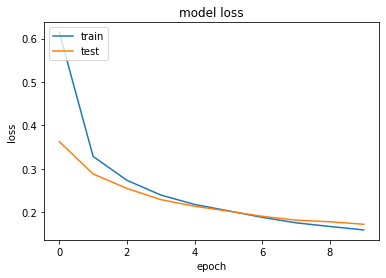

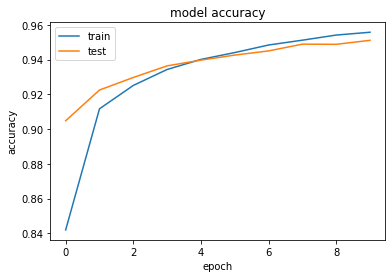

In [ ]:
# We now want to plot the train and validation loss functions and accuracy curves
print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# END CODE HERE
plt.show()


## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

In [ ]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture

input_shape = 784
hidden_1 = 300
hidden_2 = 128
hidden_3 = 84
output_shape = 10

model2 = Sequential()
model2.add(Dense(hidden_1,input_shape=(input_shape,),activation='relu'))
model2.add(Dense(hidden_2,input_shape=(hidden_1,),activation='relu'))
model2.add(Dense(hidden_3,input_shape=(hidden_2,),activation='relu'))
model2.add(Dense(output_shape,input_shape=(hidden_3,),activation='sigmoid'))

epochs = 10

# START CODE HERE
batch_size = 128

eta = 0.01

learning_rate = 0.01
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr = eta), metrics=["accuracy"])

print('Training')
history = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data = (X_test, Y_test))  

Training
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 37.2102 - accuracy: 0.6823 - val_loss: 0.3724 - val_accuracy: 0.8891
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3237 - accuracy: 0.9097 - val_loss: 0.2786 - val_accuracy: 0.9223
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.9285 - val_loss: 0.2333 - val_accuracy: 0.9392
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2344 - accuracy: 0.9355 - val_loss: 0.2773 - val_accuracy: 0.9223
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2069 - accuracy: 0.9426 - val_loss: 0.2332 - val_accuracy: 0.9405
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2121 - accuracy: 0.9413 - val_loss: 0.2159 - val_accuracy: 0.9425
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1943 - accuracy: 0.9467 - val_loss: 0.2217 - val_accuracy: 0.9

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


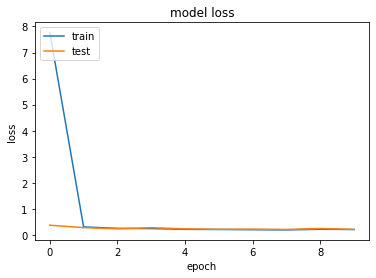

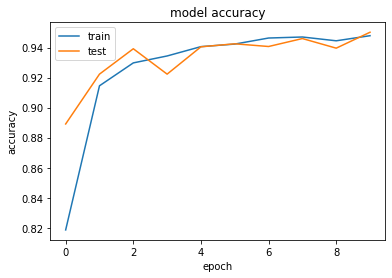

In [ ]:
# We now want to plot the train and validation loss functions and accuracy curves
print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# END CODE HERE
plt.show()


We can't really say that with this bigger architecture, increasing the batch size and using relu as activation function we were able to improve the results. The results were better using the first architecture and were also more stable on training.

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture

input_shape = 784
hidden_1 = 300
hidden_2 = 128
hidden_3 = 84
output_shape = 10

model3 = Sequential()
model3.add(Dense(hidden_1,input_shape=(input_shape,),activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(hidden_2,input_shape=(hidden_1,),activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(hidden_3,input_shape=(hidden_2,),activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(output_shape,input_shape=(hidden_3,),activation='sigmoid'))

epochs = 10

# START CODE HERE
batch_size = 128

eta = 0.01

learning_rate = 0.01
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr = eta), metrics=["accuracy"])

print('Training')
history = model3.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data = (X_test, Y_test))  

Training
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3110 - accuracy: 0.9055 - val_loss: 0.1422 - val_accuracy: 0.9575
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1052 - accuracy: 0.9667 - val_loss: 0.1157 - val_accuracy: 0.9645
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0747 - accuracy: 0.9768 - val_loss: 0.1250 - val_accuracy: 0.9662
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0613 - accuracy: 0.9800 - val_loss: 0.1008 - val_accuracy: 0.9720
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0514 - accuracy: 0.9838 - val_loss: 0.0919 - val_accuracy: 0.9736
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0427 - accuracy: 0.9859 - val_loss: 0.0831 - val_accuracy: 0.9762
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0987 - val_accuracy: 0.97

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


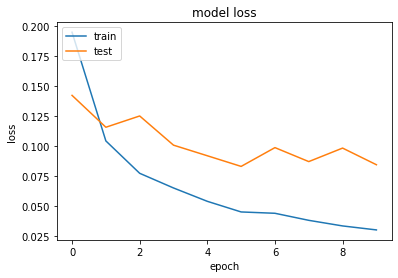

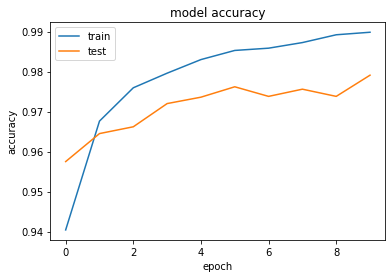

In [ ]:
# We now want to plot the train and validation loss functions and accuracy curves
print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# END CODE HERE
plt.show()


Something that I thought that could work and really did was to use batch normalisation inbetween the layers. With the same architecture but now with the batch norm, I improved the training accuracy in 4.5% and the validation accuracy (test set) in 3.25%.